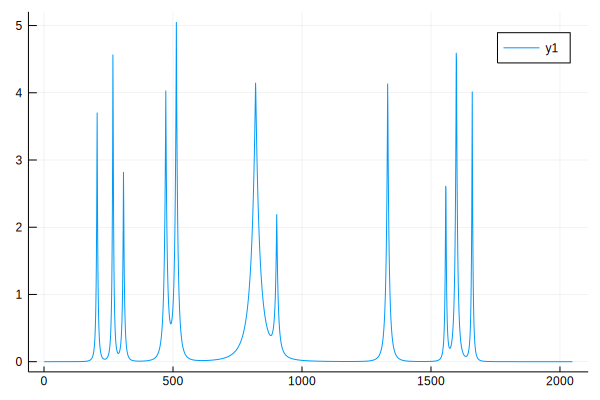

In [18]:
using Pkg, Revise, Plots, Wavelets, LinearAlgebra, FFTW
# example signal
exampleSignals = ["Blocks", "Bumps", "HeaviSine", "Doppler"]
J=11; n = 2^J
x = testfunction(n, exampleSignals[2])
plot(x)

Before actually getting into processing that signal, let's take a look at some
of the wavelets and the parameters

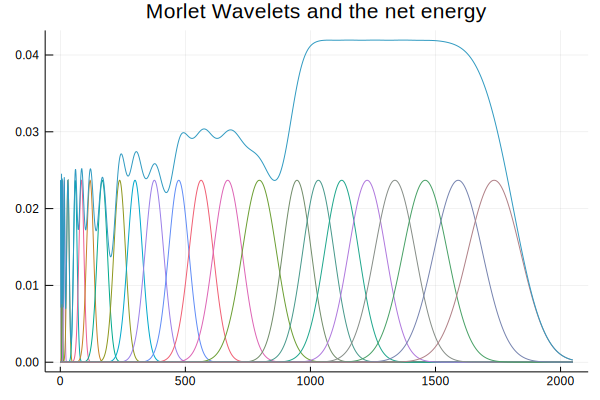

In [13]:
wt = wavelet(WT.morl)
wavelets,ω = computeWavelets(size(x,1), wt);
zeroPadded = cat(wavelets, zeros(size(x,1),24), dims=1);
plot([wavelets sum(wavelets,dims=2)], labels="",title="Morlet Wavelets and the net energy")

A note on the spacing. The default is 8 per octave, decreasing by a factor of
$j$, though this can be changed. In the above example, there are 

In [14]:
nOctaves = log2(max(n, 2)) - wt.averagingLength

9.0

octaves, each of which has

In [15]:
[max(1, round(Int, wt.scalingFactor / x^(wt.decreasing))) for x=1:round(Int, nOctaves)]'

1×9 Adjoint{Int64,Array{Int64,1}}:
 8  4  3  2  2  1  1  1  1

wavelets per octave. If you are interested in including an averaging function,
a decent default `averagingLength` is 2. By default it is zero, and there is no
averaging, just the scaling wavelets.

Now that we have some idea of what the wavelets themselves look like, lets see
how they transform some example signals.

First, Let's look at the morlet wavelets. These are almost analytic as formally
defined, and rounded to be so here. In the fourier domain, they are given by
\begin{align*}
\psi_0(x) = \pi^{-1/4}e^{\omega_0x}e^{-x^2/2}
\end{align*}

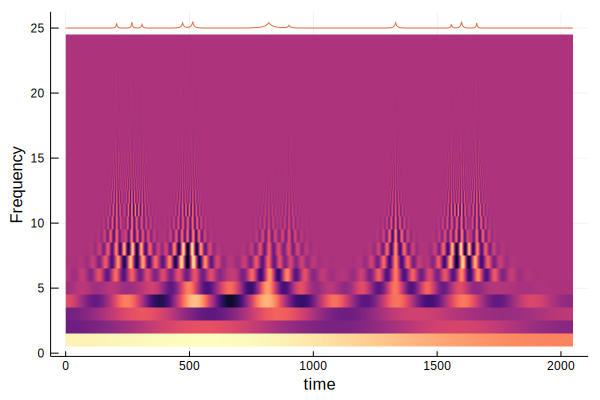

In [25]:
y = cwt(x, wavelet(WT.morl));
heatmap(real.(y)', xlabel="time", ylabel="Frequency", colorbar=false, color=:magma); plot!(x./2/norm(x,Inf) .+ size(y,2) .+ 1,label="")

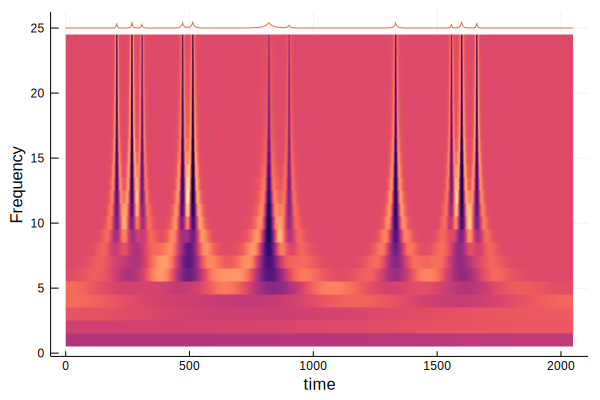

In [20]:
y = cwt(x, wavelet(WT.dog2))
heatmap(real.(y)', xlabel="time", ylabel="Frequency", colorbar=false, color=:magma); plot!(x./2/norm(x,Inf) .+ size(y,2) .+ 1,label="")

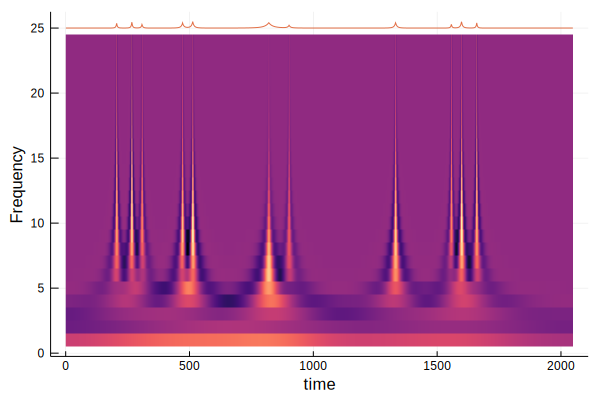

In [21]:
y = cwt(x, wavelet(WT.paul4))
heatmap(real.(y)', xlabel="time", ylabel="Frequency", colorbar=false, color=:magma); plot!(x./2/norm(x,Inf) .+ size(y,2) .+ 1,label="")